In [10]:
"""
Datta, "Quantum Transport: Atom to Transistor" Fig. 4.3.1

Yong-Hoon Kim, School of Electrical Engineering, Korea Advanced Institute of Science & Technology (KAIST)
2020/12/26
"""
import numpy as np
from numpy import linalg as LA 
import matplotlib.pyplot as plt

# Atomic units
AU2ANG = 0.5291772083
AU2EV = 27.21138344

# Effective mass atomic units
em = 1.   # effective mass [free electron mass] 
eps = 1.   # permittivity [vacuum permittivity]
EU2ANG = AU2ANG * eps / em
EU2EV = AU2EV * em / eps
print(EU2ANG)
print(EU2EV)
ANG2EU = 1/EU2ANG
EV2EU = 1/EU2EV

0.5291772083
27.21138344


In [42]:
# Input 
mu = 0.25   # electrochemical potential = E_c + \mu eV
kT = 0.025  # thermal energy [eV]
deltaU = +10. # # Impurity potential [eV]

xmin = 0.; xmax = 202.  # X range[Ang]
nx = 100   # Num. of grid points (excluding box boundary points)

# Convert to EU
mu = mu * EV2EU
kT = kT * EV2EU
deltaU = deltaU * EV2EU
xmin = xmin * ANG2EU; xmax = xmax * ANG2EU

# X lattice
X = np.linspace(xmin,xmax,nx+2) # Total points **including** box boundary points
print(X.size)
dx = X[1] - X[0] 
X = X[1:-1]
print(X*EU2ANG)
print('dx= %.1f [Ang]' % (dx*EU2ANG))

102
[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110. 112.
 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138. 140.
 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166. 168.
 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194. 196.
 198. 200.]
dx= 2.0 [Ang]


3.7794522678425033 0.035003564723022705


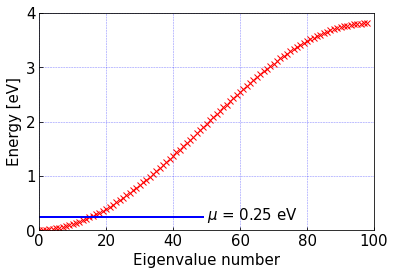

In [50]:
# Hamiltonian
t0 = 1/(2*dx**2)
print(dx,t0)
T = 2*t0*np.eye(nx) - t0*np.eye(nx,k=+1) - t0*np.eye(nx,k=-1) 
# Potential
Ux = np.linspace(0, 0, nx)

# For parts (d) & (f)
T[0,nx-1] = -t0; T[nx-1,0] = -t0  # PBC 
Ux[int(nx/2)] = Ux[int(nx/2)] + deltaU  # impurity potential
#print(Ux)

# (1) Diagonalization 
# (E = V^+ H V => [V]: columns are eigenvectors corresponding to eigenvalues [E]):
E,V = LA.eigh(T + np.diag(Ux))
#print(E)

# Plot eigenvalues
fig = plt.figure()
plt.plot(E*EU2EV,'rx',lw=2)
plt.plot(mu*EU2EV*np.ones((nx//2,1)),'b',lw=2)
plt.xlabel('Eigenvalue number',fontsize=15)
plt.ylabel('Energy [eV]',fontsize=15)
plt.xlim(0,100)
plt.ylim(0,4)
plt.tick_params(axis='both',which='major',labelsize=15,direction='in')
plt.text(50,0.2,'$\mu$ = %.2f eV'% (mu*EU2EV),fontsize=15)
plt.grid(color='b', alpha=0.5, ls='--',lw=0.5)

[9.99952876e-001 9.99947236e-001 9.99936498e-001 9.99917212e-001
 9.99884822e-001 9.99824955e-001 9.99719483e-001 9.99502814e-001
 9.99086074e-001 9.98112334e-001 9.96042687e-001 9.90519514e-001
 9.77651606e-001 9.39792165e-001 8.52472270e-001 6.39827224e-001
 3.68937553e-001 1.34452060e-001 4.37114813e-002 1.04274114e-002
 2.78136979e-003 5.60115741e-004 1.34249348e-004 2.36413099e-005
 5.15963997e-006 8.01007294e-007 1.60293391e-007 2.20895940e-008
 4.08048278e-009 5.02908542e-010 8.63398858e-011 9.59452778e-012
 1.54147989e-012 1.55803592e-013 2.35889643e-014 2.18883347e-015
 3.14494201e-016 2.70545185e-017 3.71518477e-018 2.99356455e-019
 3.95693211e-020 3.01841406e-021 3.86794062e-022 2.82415996e-023
 3.53372739e-024 2.49762455e-025 3.07350015e-026 2.12714006e-027
 2.59292521e-028 1.77772415e-029 2.16210063e-030 1.48570525e-031
 1.81591083e-032 1.26532355e-033 1.56548156e-034 1.11902414e-035
 1.41157658e-036 1.04700783e-037 1.35633141e-038 1.05569902e-039
 1.41460491e-040 1.168123

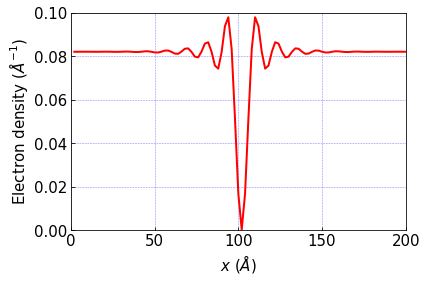

In [54]:
# (2) Density matrix @ Eqm.: Fermi function of the Hamiltonian function:
rho = 1/(1 + np.exp((E-mu)/kT))
print(rho)
# (3) Transforms DM back to the original representation:
rho = V.dot(np.diag(rho)).dot(V.conj().T)
#print(np.diag(rho))
rho = np.diag(rho)/dx
#print(rho)

fig = plt.figure()
plt.plot(X*EU2ANG, rho/EU2ANG,'r',lw=2)
plt.xlabel('$x$ ($\AA$)',fontsize = 15)
plt.ylabel('Electron density ($\AA^{-1}$)',fontsize = 15)
plt.xlim(0,200)
plt.ylim(0,0.10)
plt.tick_params(axis='both',which='major',labelsize=15,direction='in')
#plt.xticks(np.arange(50,250,50))
#plt.title('(c) $n(x)$ vs. $x$, $k_BT$ = 0.025 eV',fontsize=15)
plt.grid(color='b', alpha=0.5, ls='--',lw=0.5)